In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

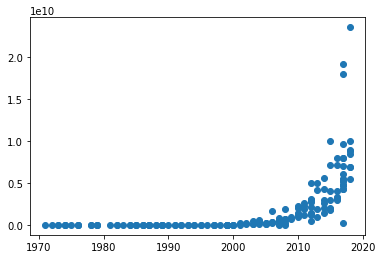

In [2]:
data = pd.read_csv("../data/moore.csv", header = None)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])

In [3]:
X, y = data.iloc[:, 0].values, np.log(data.iloc[:, 1].values)
X = X - np.mean(X)
X = X.reshape([-1, 1])

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")

def schedule(epoch, lr):
    if epoch >= 50:
        return 1e-4
    return 1e-3
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=schedule)

r = model.fit(X, y, epochs = 200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 707us/step - loss: 584.5870
Epoch 2/200
6/6 [==============================] - 0s 637us/step - loss: 320.1764
Epoch 3/200
6/6 [==============================] - 0s 741us/step - loss: 273.6698
Epoch 4/200
6/6 [==============================] - 0s 614us/step - loss: 188.4010
Epoch 5/200
6/6 [==============================] - 0s 679us/step - loss: 167.4821
Epoch 6/200
6/6 [==============================] - 0s 767us/step - loss: 136.6048
Epoch 7/200
6/6 [==============================] - 0s 699us/step - loss: 92.2830
Epoch 8/200
6/6 [==============================] - 0s 717us/step - loss: 82.8829
Epoch 9/200
6/6 [==============================] - 0s 830us/step - loss: 47.7351
Epoch 10/200
6/6 [==============================] - 0s 740us/step - loss: 36.8619
Epoch 11/200
6/6 [==============================] - 0s 746us/step - loss: 27.5372
Epoch 12/200
6/6 [==============================] - 0s 753us/step - loss: 19.4148
Epoch 13/200
6/6 [=

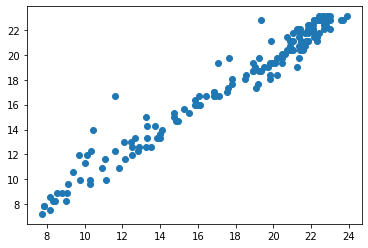

In [7]:
plt.scatter(y, model.predict(X))